<a href="https://colab.research.google.com/github/luan640/RegressionLine-/blob/main/Regress%C3%A3oLinear_Como_utilizar_o_Algoritmo_(apartamentos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula de Regressão linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Leitura dos dados
- X representa os M³ do apartamento que possuem uma variação de 40m³ até 120 m³
- y é o preço do apartamento

In [2]:
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

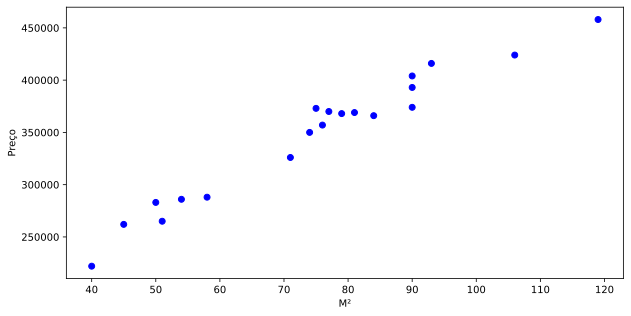

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")

## Representando uma Reta

In [4]:
def predict(alpha, beta, X):
    return alpha*X + beta

## Escolhendo melhor alpha e beta

In [5]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[  1., 119.],
       [  1.,  54.],
       [  1.,  76.],
       [  1.,  74.],
       [  1.,  81.],
       [  1.,  75.],
       [  1.,  40.],
       [  1.,  51.],
       [  1.,  45.],
       [  1.,  77.],
       [  1.,  90.],
       [  1.,  84.],
       [  1.,  90.],
       [  1.,  58.],
       [  1.,  50.],
       [  1., 106.],
       [  1.,  93.],
       [  1.,  79.],
       [  1.,  90.],
       [  1.,  71.]])

In [6]:
X_b.T.dot(X_b)

array([[2.00000e+01, 1.50300e+03],
       [1.50300e+03, 1.21057e+05]])

In [7]:
#métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[127420.49947265],
       [  2931.19761181]])

## Ajustando a reta

In [8]:
alpha = theta_best[1] #inclinação
beta = theta_best[0]

In [9]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

In [10]:
ỹ

array([[476233.01527777],
       [285705.17051027],
       [350191.51797004],
       [344329.12274642],
       [364847.50602908],
       [347260.32035823],
       [244668.40394496],
       [276911.57767484],
       [259324.392004  ],
       [353122.71558184],
       [391228.28453534],
       [373641.0988645 ],
       [391228.28453534],
       [297429.9609575 ],
       [273980.38006304],
       [438127.44632427],
       [400021.87737077],
       [358985.11080546],
       [391228.28453534],
       [335535.529911  ]])

## Plotando os Dados

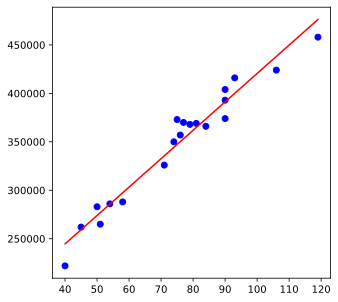

In [11]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

## Como implementar uma regressão linear usando o Scikit-learn?

In [12]:
from sklearn.linear_model import LinearRegression

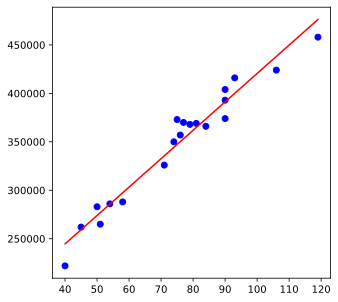

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X, y)

LinearRegression()

In [16]:
ỹ = lr.predict(X)

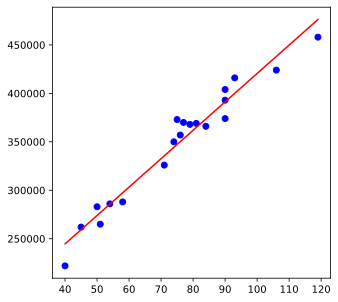

In [17]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [18]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.95


## Avaliando meu modelo de regressão

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y, ỹ))
print('MSE:', metrics.mean_squared_error(y, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ỹ)))

MAE: 11077.531749017771
MSE: 167868773.39928824
RMSE: 12956.418231875978
